<a href="https://colab.research.google.com/github/AnIsAsPe/LogisticRegression_SpamOpinion/blob/master/Notebooks/Preprocesamiento_y_vectorizaci%C3%B3n_de_Textos_con_BOW_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Funciones

In [2]:
def elimina_stopwords(texto):
  '''La función usa expresiones regulares (re) para quitar todas las palabras 
  que sean una palabra vacia:'''
  stop = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  nuevo_texto = stop.sub('', texto)
  return nuevo_texto

# https://www.regular-expressions.info/index.html
# https://www.tutorialspoint.com/Why-do-we-use-re-compile-method-in-Python-regular-expression

In [3]:
elimina_stopwords("I love how you cook".lower())

'love cook'

In [4]:
def elimina_puntuacion_y_numeros(texto):
  nuevo_texto = re.sub('[^a-z]+', ' ', texto)
  return nuevo_texto


In [5]:
elimina_puntuacion_y_numeros("Is he 8 years old?".lower())

'is he years old '

In [6]:
def lematizar(texto):
  lemma = WordNetLemmatizer()
  texto=texto.split()
  texto2 = " ".join([lemma.lemmatize(i, 'v') for i in texto])
  nuevo_texto = " ".join([lemma.lemmatize(i, 'v') for i in texto])
  return nuevo_texto

In [7]:
lematizar("ran run running")

'run run run'

In [8]:
def stemmer(texto):
  st = PorterStemmer()
  texto = texto.split()
  nuevo_texto = ' '.join([st.stem(i) for i in texto])
  return nuevo_texto

In [9]:
stemmer("ran run running")

'ran run run'

In [10]:
def preprocesar(texto):
  texto = texto.lower()
  texto = elimina_stopwords(texto)
  texto = elimina_puntuacion_y_numeros(texto)
  texto = stemmer(texto)
  return(texto)


# Lectura de datos y breve exploración

In [11]:
datos = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/LogisticRegression_SpamOpinion/master/Datos/deceptive-opinion.csv',
                     usecols=['deceptive','text']
                    )
print(datos.shape)
datos.head()

(1600, 2)


,deceptive,text
0,truthful,We stayed for a one night getaway with family ...
1,truthful,Triple A rate with upgrade to view room was le...
2,truthful,This comes a little late as I'm finally catchi...
3,truthful,The Omni Chicago really delivers on all fronts...
4,truthful,I asked for a high floor away from the elevato...


In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   text       1600 non-null   object
dtypes: object(2)
memory usage: 25.1+ KB


In [13]:
datos.deceptive.value_counts()

truthful     800
deceptive    800
Name: deceptive, dtype: int64

In [14]:
datos['deceptive'] = np.where(datos['deceptive']=='deceptive', 1, 0)
datos['deceptive'].value_counts()

0    800
1    800
Name: deceptive, dtype: int64

In [15]:
y = datos['deceptive']

# Preprocesamiento de texto

In [16]:
datos['text']

0       We stayed for a one night getaway with family ...
1       Triple A rate with upgrade to view room was le...
2       This comes a little late as I'm finally catchi...
3       The Omni Chicago really delivers on all fronts...
4       I asked for a high floor away from the elevato...
                              ...                        
1595    Problems started when I booked the InterContin...
1596    The Amalfi Hotel has a beautiful website and i...
1597    The Intercontinental Chicago Magnificent Mile ...
1598    The Palmer House Hilton, while it looks good i...
1599    As a former Chicagoan, I'm appalled at the Ama...
Name: text, Length: 1600, dtype: object

In [17]:
datos['long_text'] = datos['text'].str.len()

In [18]:
datos 

,deceptive,text,long_text
0,0,We stayed for a one night getaway with family ...,572
1,0,Triple A rate with upgrade to view room was le...,286
2,0,This comes a little late as I'm finally catchi...,1104
3,0,The Omni Chicago really delivers on all fronts...,707
4,0,I asked for a high floor away from the elevato...,384
...,...,...,...
1595,1,Problems started when I booked the InterContin...,746
1596,1,The Amalfi Hotel has a beautiful website and i...,671
1597,1,The Intercontinental Chicago Magnificent Mile ...,771
1598,1,"The Palmer House Hilton, while it looks good i...",449


In [19]:
indice = 0
ejemplo = datos.loc[indice, 'text']
print(len(ejemplo))
ejemplo

572


'We stayed for a one night getaway with family on a thursday. Triple AAA rate of 173 was a steal. 7th floor room complete with 44in plasma TV bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) Concierge was very helpful. You cannot beat this location... Only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. Food was very good so it was worth the wait. I would return in a heartbeat. A gem in chicago... \n'

#### Transformar texto a minúsculas

In [20]:
ejemplo = ejemplo.lower()
print(len(ejemplo))
ejemplo

572


'we stayed for a one night getaway with family on a thursday. triple aaa rate of 173 was a steal. 7th floor room complete with 44in plasma tv bose stereo, voss and evian water, and gorgeous bathroom(no tub but was fine for us) concierge was very helpful. you cannot beat this location... only flaw was breakfast was pricey and service was very very slow(2hours for four kids and four adults on a friday morning) even though there were only two other tables in the restaurant. food was very good so it was worth the wait. i would return in a heartbeat. a gem in chicago... \n'

#### Quitar puntuación

In [21]:
ejemplo = elimina_puntuacion_y_numeros(ejemplo)
print(len(ejemplo))
ejemplo

547


'we stayed for a one night getaway with family on a thursday triple aaa rate of was a steal th floor room complete with in plasma tv bose stereo voss and evian water and gorgeous bathroom no tub but was fine for us concierge was very helpful you cannot beat this location only flaw was breakfast was pricey and service was very very slow hours for four kids and four adults on a friday morning even though there were only two other tables in the restaurant food was very good so it was worth the wait i would return in a heartbeat a gem in chicago '

#### Quitar Palabras Irrelevantes ("Stopwords")

In [22]:
ejemplo = elimina_stopwords(ejemplo)
print(len(ejemplo))
ejemplo

362


'stayed one night getaway family thursday triple aaa rate steal th floor room complete plasma tv bose stereo voss evian water gorgeous bathroom tub fine us concierge helpful cannot beat location flaw breakfast pricey service slow hours four kids four adults friday morning even though two tables restaurant food good worth wait would return heartbeat gem chicago '

## Normalización
Existen dos principales técnicas para normalizar el texto, la lematización y "radicalización" o stemming, que consiste en la  conversión de palabras en las raices

Referencia: 

https://towardsdatascience.com/introduction-to-nlp-part-2-difference-between-lemmatisation-and-stemming-3789be1c55bc

In [23]:
ejemplo_lema = lematizar(ejemplo)
print(len(ejemplo))
ejemplo_lema

362


'stay one night getaway family thursday triple aaa rate steal th floor room complete plasma tv bose stereo voss evian water gorgeous bathroom tub fine us concierge helpful cannot beat location flaw breakfast pricey service slow hours four kid four adults friday morning even though two table restaurant food good worth wait would return heartbeat gem chicago'

In [24]:
len(ejemplo) , len(ejemplo_lema)

(362, 357)

In [25]:
ejemplo_stem = stemmer(ejemplo)
print(len(ejemplo))
ejemplo_stem

362


'stay one night getaway famili thursday tripl aaa rate steal th floor room complet plasma tv bose stereo voss evian water gorgeou bathroom tub fine us concierg help cannot beat locat flaw breakfast pricey servic slow hour four kid four adult friday morn even though two tabl restaur food good worth wait would return heartbeat gem chicago'

## Todo junto

In [26]:
datos['text_pp'] = datos['text'].apply(preprocesar)
datos['long_text_pp'] = datos['text_pp'].str.len()
datos.head()

,deceptive,text,long_text,text_pp,long_text_pp
0,0,We stayed for a one night getaway with family ...,572,stay one night getaway famili thursday tripl a...,340
1,0,Triple A rate with upgrade to view room was le...,286,tripl rate upgrad view room less also includ b...,186
2,0,This comes a little late as I'm finally catchi...,1104,come littl late final catch review past sever ...,624
3,0,The Omni Chicago really delivers on all fronts...,707,omni chicago realli deliv front spacious room ...,387
4,0,I asked for a high floor away from the elevato...,384,ask high floor away elev got room pleasantli d...,197


# Visualización de nubes de palabras

In [27]:
from wordcloud import WordCloud

In [28]:
def nube_palabras(sec_textos):
    # Crear la cadena con la que haremos la nube de palabras
    text= " ".join(review for review in sec_textos)
    
    # Crear la nube de palabras
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white").generate(text)

    # Desplegar la imagen generada
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

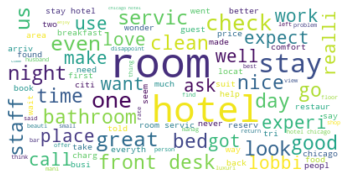

In [29]:
nube_palabras(datos['text_pp'])

In [30]:
porClase = datos.groupby('deceptive')
verdaderas = porClase.get_group(0).text_pp
falsas = porClase.get_group(1).text_pp

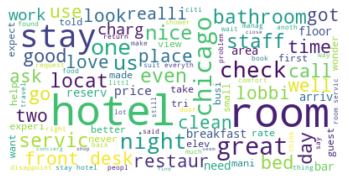

In [31]:
nube_palabras(verdaderas)

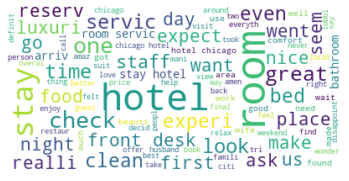

In [32]:
nube_palabras(falsas)

# Vectorización de Texto mediante BOW

In [33]:
vectorizer = TfidfVectorizer(min_df=2)
BOW = vectorizer.fit_transform(datos['text_pp'])
BOW.shape

(1600, 3616)

In [34]:
palabras = vectorizer.get_feature_names_out()
X = pd.DataFrame(BOW.todense(), index=datos.index, columns=palabras)
X

,aaa,abil,abl,abrupt,absenc,absent,absolut,absurd,abund,abysm,...,york,young,younger,yr,yuck,yummi,yup,zest,zone,zoo
0,0.1882,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.0,0.084973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1596,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1597,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
